In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

df=pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [30]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [31]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [32]:
df.dropna(inplace=True)

Predictions (2017–2025):
2017: Linear=14.09 °C, Polynomial=9.51 °C
2018: Linear=14.57 °C, Polynomial=7.87 °C
2019: Linear=15.04 °C, Polynomial=5.93 °C
2020: Linear=15.52 °C, Polynomial=3.69 °C
2021: Linear=16.00 °C, Polynomial=1.15 °C
2022: Linear=16.48 °C, Polynomial=-1.70 °C
2023: Linear=16.95 °C, Polynomial=-4.84 °C
2024: Linear=17.43 °C, Polynomial=-8.29 °C
2025: Linear=17.91 °C, Polynomial=-12.04 °C


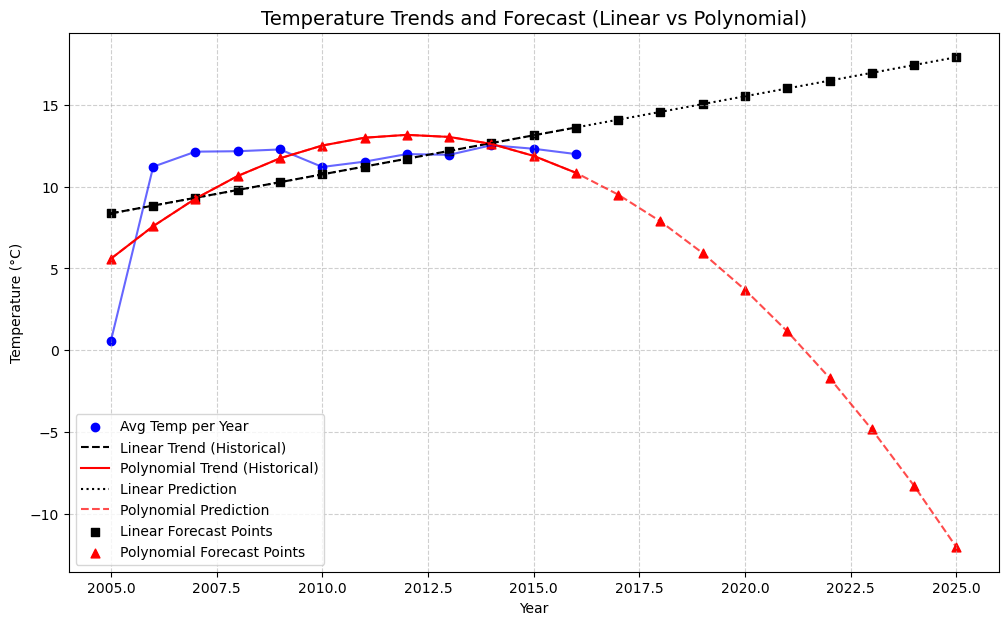

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv("weatherHistory.csv")

# Convert and extract year
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')
df['Year'] = df['Formatted Date'].dt.year

# Yearly average temperature
yearly_avg = df.groupby('Year')['Temperature (C)'].mean().reset_index()
X_vals = yearly_avg['Year'].values.reshape(-1, 1)
temps = yearly_avg['Temperature (C)'].values

# ---- Linear Regression ----
lin_model = LinearRegression()
lin_model.fit(X_vals, temps)
linear_fit = lin_model.predict(X_vals)

# ---- Polynomial Regression (Degree 2) ----
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_vals)

poly_model = LinearRegression()
poly_model.fit(X_poly, temps)
poly_fit = poly_model.predict(X_poly)

# ---- Future Prediction (up to 2025) ----
future_years = np.arange(X_vals.min(), 2026).reshape(-1, 1)  # Extend until 2025
future_linear = lin_model.predict(future_years)
future_poly = poly_model.predict(poly.transform(future_years))

# Display prediction values in console
print("Predictions (2017–2025):")
for year, l_val, p_val in zip(future_years.ravel(), future_linear, future_poly):
    if year >= 2017:  # Only show future years
        print(f"{year}: Linear={l_val:.2f} °C, Polynomial={p_val:.2f} °C")

# ---- Visualization ----
plt.figure(figsize=(12, 7))

# Original scatter and line
plt.scatter(X_vals, temps, color='blue', label="Avg Temp per Year")
plt.plot(X_vals, temps, color='blue', alpha=0.6)

# Trend lines
plt.plot(X_vals, linear_fit, 'k--', label="Linear Trend (Historical)")
plt.plot(X_vals, poly_fit, 'r-', label="Polynomial Trend (Historical)")

# Extended prediction lines
plt.plot(future_years, future_linear, 'k:', label="Linear Prediction")
plt.plot(future_years, future_poly, 'r--', alpha=0.7, label="Polynomial Prediction")

# Mark predicted points
plt.scatter(future_years, future_linear, marker='s', color='black', s=40, label="Linear Forecast Points")
plt.scatter(future_years, future_poly, marker='^', color='red', s=40, label="Polynomial Forecast Points")

plt.title("Temperature Trends and Forecast (Linear vs Polynomial)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
